In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000
...,...,...
361,2017-08-19,0.030000
362,2017-08-20,0.005000
363,2017-08-21,0.193333
364,2017-08-22,0.166667


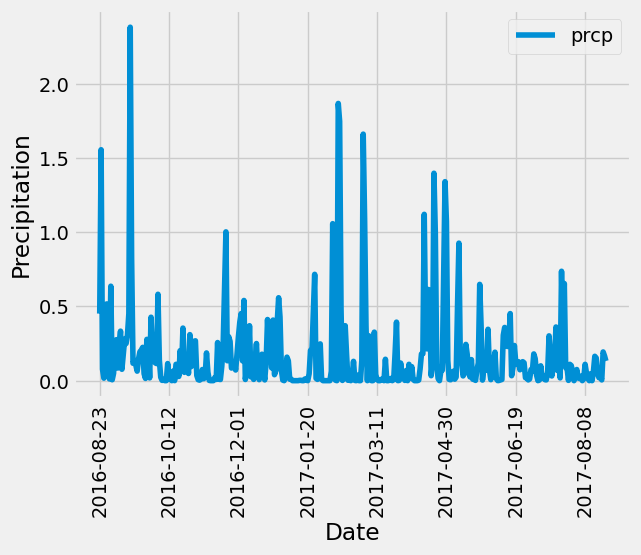

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta (days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [
    measurement.date,
    func.avg(measurement.prcp)
]
year_scores = (
    session.query(*sel)
    .filter(measurement.date >= query_date)
    .group_by(measurement.date)
    .order_by(measurement.date)
    .all()
)

#for result in year_scores:
#    print(result)

# Sort the dataframe by date
year_scores_df= pd.DataFrame(year_scores, columns= ["date", "prcp"]).sort_values('date')
display(year_scores_df)
#Use Pandas Plotting with Matplotlib to plot the data
year_scores_df.plot(
    x = "date",
    y= "prcp",
    rot = 90 
)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()



In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_table = year_scores_df.describe()
summary_table

,prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [45]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#session.query(station.station).order_by(measurement.date.desc()).first()

active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).\
    desc()).all()
active_stations 


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(measurement.tobs)
sel = ()
sel = [
    measurement.station,
    func.max(measurement.tobs),
    func.min(measurement.tobs),
    func.avg(measurement.tobs)]
active_station = session.query(*sel).filter(measurement.station == "USC00519281").all()
print(active_station)

[('USC00519281', 85.0, 54.0, 71.66378066378067)]


,Temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0.5, 0, 'Temperature(F)')

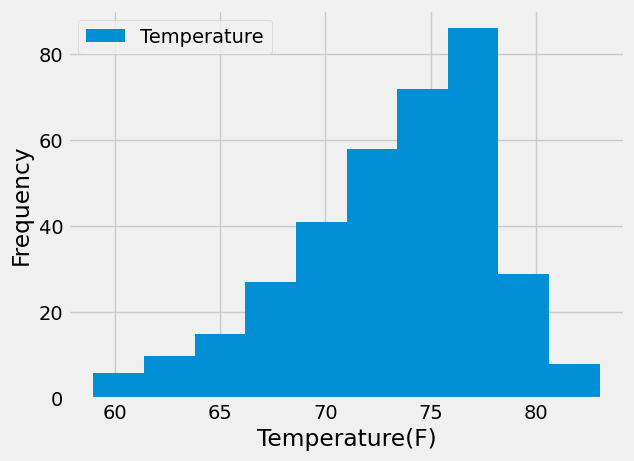

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_date = dt.date(2017, 8, 23) - dt.timedelta (days=365)
# Perform a query to retrieve the data and precipitation scores


year_scores = (
    session.query(measurement.tobs)
    .filter(measurement.date >= query_date)
    .filter(measurement.station == "USC00519281")
    .all()
    )
#for x in year_scores:
#    print(x)
year_scores_df_most_active = pd.DataFrame(year_scores, columns=["Temperature"])
display(year_scores_df_most_active)

# year_scores_df_most_active.plot(
#    x = "Month",
#    y= "Temperature",
#    rot = 90 
# )

year_scores_df_most_active.plot.hist()
plt.xlabel("Temperature(F)")

In [47]:
type(year_scores)

list

# Close Session

In [48]:
# Close Session
session.close()